# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [14]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = "/home/shah/CarND-Term1-Starter-Kit/train.p"
testing_file = "/home/shah/CarND-Term1-Starter-Kit/test.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   27839 samples
Validation Set: 6960 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [15]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

n_validation = len(X_validation)

# TODO: What's the shape of an traffic sign image?
image_shape = (32, 32, 3)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 27839
Number of testing examples = 12630
Number of validation examples = 6960
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

32


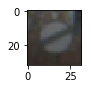

In [16]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [17]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Shuffle the data 
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [18]:
# set EPOCHS and BATCH_SIZE
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

In [19]:
# Implement LeNet-5
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Input = 14X14X6. Output = 10x10x16.
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    # out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    # out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    print ('logits', logits)
    
    return logits

In [20]:
#features and labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [21]:
#training pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

logits Tensor("add_9:0", shape=(?, 43), dtype=float32)


In [22]:
#model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [23]:
#train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'my_lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.656

EPOCH 2 ...
Validation Accuracy = 0.823

EPOCH 3 ...
Validation Accuracy = 0.888

EPOCH 4 ...
Validation Accuracy = 0.910

EPOCH 5 ...
Validation Accuracy = 0.924

EPOCH 6 ...
Validation Accuracy = 0.942

EPOCH 7 ...
Validation Accuracy = 0.951

EPOCH 8 ...
Validation Accuracy = 0.949

EPOCH 9 ...
Validation Accuracy = 0.951

EPOCH 10 ...
Validation Accuracy = 0.955

Model saved


In [24]:
#test the model
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.868


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
We shuffle the training data to preprocess it. We choose this technique to remove the impact of the ordering of data during training.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Training and test data was provided. Validation data was created by using the train_test_split function from the sklearn.model_selection. We used 20% of the training data to create a validation set. We generated the validation data set to validate the model after training. The validation dataset is a subset of the training dataset.



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
We use a 5-Layer Convolutional Networks (ConvNets) architecture, much like the LeNet architecture. The input, a 32X32X3 image, is fed into Layer 1.

Layer 1 is a ConvNets C1, with Input = 32x32x3 and Output = 28x28x6. A ReLU is used for activation in this layer. The output of C1 is fed into Max Pooling with Input = 28x28x6 and Output = 14x14x6. The output of Layer 1 is fed into Layer 2

Layer 2 is another ConvNets C2 with Input = 14X14X6 and Output = 10x10x16. A ReLU is used for activation in this layer. The output of C2 is fed into Max Pooling with Input = 10x10x16 and Output = 5x5x16. The output of Layer 2 is flattened with Input = 5x5x16 and Output = 400.The output of Layer 2 is fed into Layer 3.
 
Layer 3 is a fully connected neural network with Input = 400 and Output = 120. A ReLU is is used for activation in this layer. The output of Layer 3 is fed into a Layer 4.

Layer 4 is also a fully connected neural network with Input = 120 and Output = 84. A ReLU is is used for activation in this layer. The output of Layer 4 is fed into a Layer 5.

Layer 5 is Classifier with Input = 84 and Output = 43, corresponding to the 43 output classes.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
EPOCHS = 10
BATCH_SIZE = 128
mu = 0
sigma = 0.1
rate = 0.001
Optimizer = ADAM


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I used LeNet-5 since it is a well known solution/implementation for recognizing visual patterns directly from pixel images with minimal preprocessing. 


Please discuss how did you choose the optimzer. 
    I choose the ADAM optimizer. Let us begin with Gradient descent. From the Lesson: Gradient descent works by first calculating the slope of the plane at the current point, which includes calculating the partial derivatives of the loss with respect to all of the parameters. This set of partial derivatives is called the gradient. Then it uses the gradient to modify the weights such that the next forward pass through the network moves the output lower in the hyperplane. Physically, this would be the same as measuring the slope of the valley at the location of the ball, and then moving the ball a small amount in the direction of the slope. Over time, it's possible to find the bottom of the valley with many small movements.We need to find a path that takes us to the optimum gradient descent is the most popular way to find the optimum. An improvement on gradient descent is the stochastic gradient descentn(SGD). Again from the Lesson: Stochastic Gradient Descent (SGD) is a version of Gradient Descent where on each forward pass a batch of data is randomly sampled from total dataset. Remember when we talked about the batch size earlier? That's the size of the batch. Ideally, the entire dataset would be fed into the neural network on each forward pass, but in practice, it's not practical due to memory constraints. SGD is an approximation of Gradient Descent, the more batches processed by the neural network, the better the approximation. ADAM is an improvement ofver SGD. In ADAM the gradient used in each iteration is updated from the previous using a technique based in momenta.
    
Please discuss how did you tell a convolutional layer is well suited for this problem.
    Convolution layers is well suited for this problem becasue we know we are working with images.  Each layer might capture a different level in the hierarchy of objects. It allows us to hrecognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects. 
    
Please discuss how did you choose the particular activation. 
    We choose ReLUs for activation becasue of their simplicity. One, RELUs have nice derivates, that is, it is the derivative is constant when x > 0. It reduces the liklihood of the gadient to vanish. Two, ReLUs are sparse. Sparsity arises when x <= 0. The more such units that exist in a layer the more sparse the resulting representation.

Please discuss how did yotune the hyperparameter. 
    I experiments with the hyperparameters. For example, when I changed the learning rate I could check the accuracy and see if it is improving or deterorating or not. Similarly, I could change the EPOCHS and batch size to see its affects.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

Test Accuracy = 0.200
[[ 1.        ]
 [ 0.99999917]
 [ 0.99981338]
 [ 0.94121915]
 [ 1.        ]]
[[17]
 [ 9]
 [15]
 [23]
 [35]]


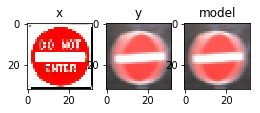

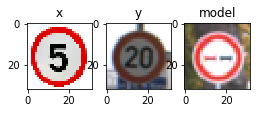

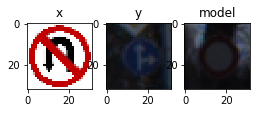

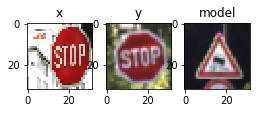

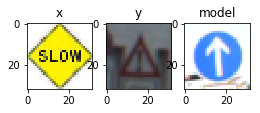

In [25]:
#test the model with new images
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import numpy as np
%matplotlib inline

def process_img(name):
    #print (name)
    image = cv2.imread(name)
    image = cv2.resize(image,(32, 32))
    #print (image.shape)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #plt.imshow(image)
    return image

processed_images = []
processed_images.append(process_img("./test_images/donotenter.jpeg"))
processed_images.append(process_img("./test_images/five.jpeg"))
processed_images.append(process_img("./test_images/nouturn.jpeg"))
processed_images.append(process_img("./test_images/stop.jpeg"))
processed_images.append(process_img("./test_images/slow.jpeg"))

X_processed_images_NP = np.asarray(processed_images)

y_processed_images_NP = np.array([17,1,36,14,18])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_processed_images_NP, y_processed_images_NP)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    softmax = tf.nn.softmax(logits)
    probs = sess.run(softmax, feed_dict={x: X_processed_images_NP, y: y_processed_images_NP})
    #print (probs)
    prob, index =sess.run(tf.nn.top_k(tf.constant(probs), k=1))
    print (prob)
    print (index)

fig = plt.figure(figsize=(4,4))

a = fig.add_subplot(1,3,1)
a.set_title('x')
plt.imshow(processed_images[0])

a = fig.add_subplot(1,3,2)
a.set_title('y')
i=0
while (y_train[i] != 17):
    i+=1
image = X_train[i]
plt.imshow(image)

a = fig.add_subplot(1,3,3)
a.set_title('model')
i=0
while (y_train[i] != index[0]):
    i+=1
image = X_train[i]
plt.imshow(image)

fig = plt.figure(figsize=(4,4))

a = fig.add_subplot(1,3,1)
a.set_title('x')
plt.imshow(processed_images[1])

a = fig.add_subplot(1,3,2)
a.set_title('y')
i=0
while (y_train[i] != 0):
    i+=1
image = X_train[i]
plt.imshow(image)

a = fig.add_subplot(1,3,3)
a.set_title('model')
i=0
while (y_train[i] != index[1]):
    i+=1
image = X_train[i]
plt.imshow(image)


fig = plt.figure(figsize=(4,4))

a = fig.add_subplot(1,3,1)
a.set_title('x')
plt.imshow(processed_images[2])

a = fig.add_subplot(1,3,2)
a.set_title('y')
i=0
while (y_train[i] != 36):
    i+=1
image = X_train[i]
plt.imshow(image)

a = fig.add_subplot(1,3,3)
a.set_title('model')
i=0
while (y_train[i] != index[2]):
    i+=1
image = X_train[i]
plt.imshow(image)

fig = plt.figure(figsize=(4,4))

a = fig.add_subplot(1,3,1)
a.set_title('x')
plt.imshow(processed_images[3])

a = fig.add_subplot(1,3,2)
a.set_title('y')
i=0
while (y_train[i] != 14):
    i+=1
image = X_train[i]
plt.imshow(image)

a = fig.add_subplot(1,3,3)
a.set_title('model')
i=0
while (y_train[i] != index[3]):
    i+=1
image = X_train[i]
plt.imshow(image)


fig = plt.figure(figsize=(4,4))

a = fig.add_subplot(1,3,1)
a.set_title('x')
plt.imshow(processed_images[4])

a = fig.add_subplot(1,3,2)
a.set_title('y')
i=0
while (y_train[i] != 18):
    i+=1
image = X_train[i]
plt.imshow(image)

a = fig.add_subplot(1,3,3)
a.set_title('model')
i=0
while (y_train[i] != index[4]):
    i+=1
image = X_train[i]
plt.imshow(image)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Above, x is the image I found on the web. y is my best guess based on the signnames.csv file. model is model's prediction. Couple of the test cases (uturn and slow) are unique in that they were not similar to any image in the training set which would make their classification difficult. Following are some more reasons that the classification would be difficult:

1.The Contrast of the image.
2.The Angle of the traffic sign.
3.Image might be jittered.
4.The training data set does not include this traffic sign.
5.Background Objects.
5.Lighting


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The testing accuracy was over 85%, but the model perdicted was 20% (1 out of 5).

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The model was very certain (94% or higher) but the predicted only 20% correctly. One reason for such large discrepancy is the the German signs were used for training and validation whereas the 5 test cases were based on American signs.

I choose k=1 (althought I experimented with other k's) becasue then I could easily use the index as the predicted class id and compare it to signnames.csv. Also, then I was able to easily plot the images.

Also,I realize I can should refactor my code and streamline it, but I am lazy :-) !

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.